# Basics of CNN
---

In [42]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

In [43]:
img = imageio.imread('./img.jpg')
img.shape

(1198, 673, 3)

# Image
---


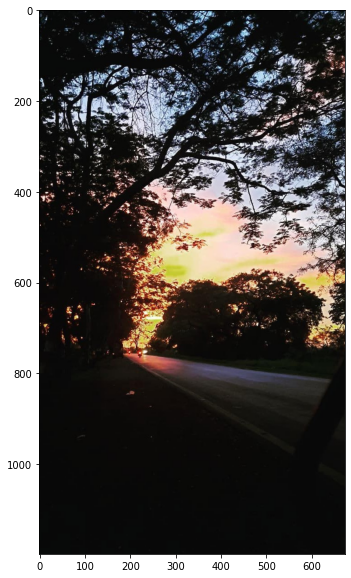

In [44]:
plt.imshow(img)

## RGB Channels

In [45]:
def show_rgb(img):
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(img[:,:,i], cmap ='gray')

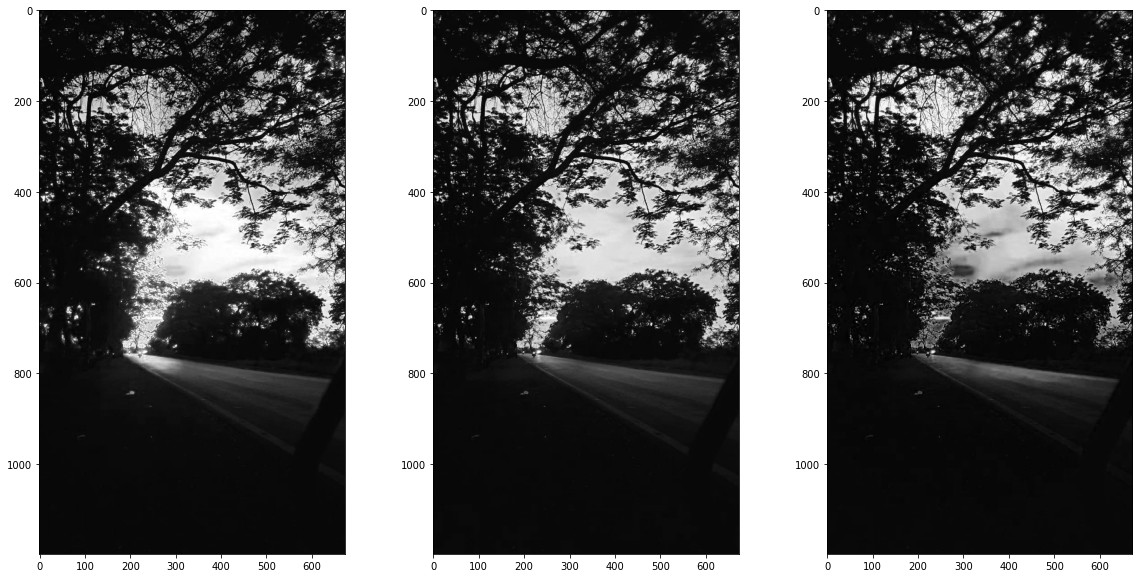

In [46]:
show_rgb(img)

# Convolutions and Layers
---

In [47]:
import torch
import numpy as np
import torch.nn.functional as F

## 1. Fully Conneted Layer

In [48]:
#Flat input tensor
x_fc = torch.randn(100,784)
x_fc

tensor([[-1.5811,  0.8932, -0.0157,  ...,  0.4895,  0.1500,  0.6714],
        [-0.0118,  0.8175,  1.4335,  ...,  0.7574, -1.7225,  0.4068],
        [ 0.5550,  0.1511, -0.1993,  ...,  0.5969,  0.0316,  0.1671],
        ...,
        [ 1.5392, -0.7613, -0.5992,  ..., -0.0717, -0.1187,  0.2721],
        [ 0.9678,  1.5830, -1.3068,  ...,  0.3928,  0.1115,  0.4909],
        [-0.1962, -0.6659,  0.7884,  ..., -0.0669,  0.9639, -0.5518]])

In [50]:
#Weights or Features
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

tensor([[ 0.0026,  0.0123,  0.0214,  ..., -0.0224, -0.0466,  0.0658],
        [-0.0005, -0.0240,  0.0185,  ...,  0.0354,  0.0436, -0.0176],
        [ 0.0166, -0.0451,  0.0323,  ...,  0.0272,  0.0361,  0.0488],
        ...,
        [-0.0234, -0.0741, -0.0579,  ...,  0.0132, -0.0456,  0.0312],
        [ 0.0385, -0.0663,  0.0104,  ...,  0.0311,  0.0290,  0.0241],
        [ 0.0082, -0.0241,  0.0423,  ...,  0.0014,  0.0273,  0.0320]],
       requires_grad=True)

In [51]:
b = torch.zeros(10, requires_grad=True)
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [54]:
y_pre = torch.matmul(x_fc,W)+b
y = F.relu(y_pre)
x_fc.shape, y.shape

(torch.Size([100, 784]), torch.Size([100, 10]))

## 2. Convolution Layer

#### Layer 1

In [56]:
x_cnn = torch.randn(100,1,28,28)
x_cnn.shape

torch.Size([100, 1, 28, 28])

In [57]:
W1 = torch.randn(16, 1, 3, 3)/np.sqrt(1*3*3)
W1.requires_grad_()

tensor([[[[-1.3089e-01,  4.5570e-01,  4.0099e-01],
          [ 3.1963e-01,  3.2700e-01, -3.2302e-01],
          [-2.2423e-01, -3.3914e-01,  1.1946e-01]]],


        [[[-4.1099e-02,  1.4275e-01, -4.4703e-01],
          [ 6.9507e-01,  3.1089e-01, -1.5510e-01],
          [ 8.1731e-02, -2.0193e-01, -1.6624e-02]]],


        [[[-3.8211e-01, -2.0188e-01, -3.4475e-01],
          [ 1.6512e-01,  3.3616e-01,  4.6693e-01],
          [-6.1459e-01, -1.6199e-01,  1.5533e-01]]],


        [[[ 1.1789e-01,  1.8297e-01,  2.2477e-01],
          [-5.8895e-02,  2.3558e-01, -5.7495e-01],
          [ 3.9296e-01,  9.1102e-01, -4.7408e-01]]],


        [[[ 3.0805e-01, -7.8658e-02,  4.8861e-01],
          [ 1.2846e-01,  2.8702e-01, -2.5184e-01],
          [ 3.4565e-01, -1.7259e-01, -2.8645e-02]]],


        [[[ 2.3269e-01, -1.8816e-01, -1.5722e-01],
          [ 1.6751e-01, -1.2674e-01, -2.3902e-01],
          [-9.5311e-02,  3.7847e-01, -1.5899e-04]]],


        [[[ 2.1069e-01, -3.6871e-01,  1.6521e-01],
       

In [59]:
b1 = torch.zeros(16, requires_grad=True)
b1

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

In [61]:
conv1_pre = F.conv2d(x_cnn, W1, bias=b1, stride=1, padding=1)
conv1 = F.relu(conv1_pre)

In [62]:
x_cnn.shape, conv1.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100, 16, 28, 28]))

#### Layer 2

In [63]:
W2 = torch.randn(32, 16, 3, 3)/np.sqrt(16*3*3)
W2.requires_grad_()

b2 = torch.zeros(32, requires_grad=True)

conv2 = F.relu(F.conv2d(conv1, W2, b2, stride=1, padding=1))
conv2.shape

torch.Size([100, 32, 28, 28])

Reshaping 

In [69]:
M = torch.zeros(4, 3)

M2 = M.view(1,1,12)
M3 = M.view(-1)
M4 = M.view(-1,2,3)
M5 = M.view(2,1,2,3)

print("M:{},\nM2: {}, \nM3: {}, \nM4: {},\nM5: {}." .format(M, M2, M3, M4, M5))

M:tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
M2: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 
M3: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 
M4: tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]),
M5: tensor([[[[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]]]]).


In [70]:
# Reshape flat input image into a 4D batched image input
x_flat = torch.randn(100, 784)
x_reshaped = x_flat.view(-1, 1, 28, 28)

# Print input shape
print(x_reshaped.shape) #CNN expects 4D input: [batch, channel, height, width]

torch.Size([100, 1, 28, 28])


In [71]:
# Flatten convolutional feature maps into a vector
h_flat = conv2.view(-1, 28*28*32)

# Print output shape
print(h_flat.shape) #"flatten" a CNN's 4D output to 2D

torch.Size([100, 25088])


## Pooling and Striding 

In [72]:
#TODO